Link to competition: https://www.kaggle.com/competitions/kaspi-lab-logo-artists
The goal is to recreate missing parts of Kaspi's logo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Part 1
Importing and visualizing train and test datasets

In [2]:
df=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [19]:
df.head()

,id,x,y,c
0,0,1477,574,1
1,1,933,1623,0
2,2,1351,254,1
3,3,318,499,1
4,4,619,1470,0


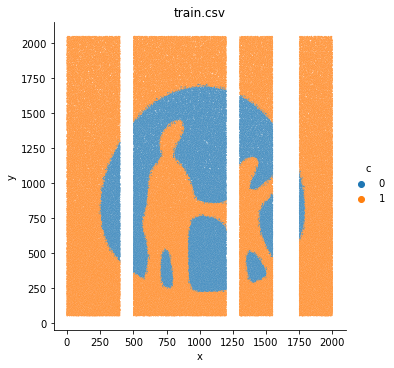

In [3]:
sns.relplot(x='x',y='y',hue='c',s=1,data=df).set(title='train.csv')

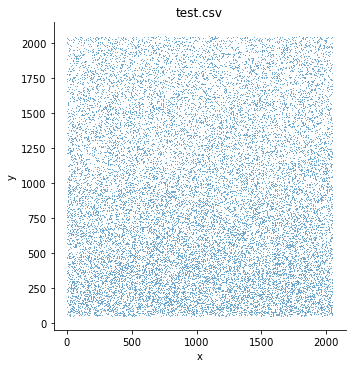

In [4]:
sns.relplot(x='x',y='y',s=1,data=df2).set(title='test.csv')

# Part 2

We start with K Nearest Neighbors model. First of all, we find the best value for parameter 'k'(number of neighbors). Then we visualize the result.

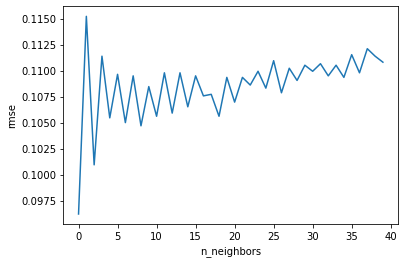

In [7]:
X=df[['x','y']]
y=df['c']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.10)

err=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn=knn.predict(X_val)
    q=mse(y_val,y_knn)
    err.append(np.sqrt(q))

plt.plot(err)
plt.xlabel('n_neighbors')
plt.ylabel('rmse')
plt.show()

In [8]:
err

[0.0962219513591303,
 0.11522665165318983,
 0.10095028451381044,
 0.1113965058176901,
 0.10546684769860012,
 0.10965128291505476,
 0.10500862606286873,
 0.10950459216989307,
 0.10470203087985373,
 0.10847220259557372,
 0.10561914647497625,
 0.10979777768033447,
 0.10592308709317358,
 0.10979777768033447,
 0.1065283668035849,
 0.10950459216989307,
 0.10757941208334681,
 0.10772872431631834,
 0.10561914647497625,
 0.10935770465619618,
 0.10698007921901839,
 0.10935770465619618,
 0.10862028758274378,
 0.10994407724913119,
 0.10832391516794625,
 0.11096277345363328,
 0.10787782988846269,
 0.11023609390489339,
 0.10906333614201559,
 0.11052733904629217,
 0.10994407724913119,
 0.11067267420315095,
 0.10950459216989307,
 0.11052733904629217,
 0.10935770465619618,
 0.11154070847458984,
 0.10979777768033447,
 0.11211566438952468,
 0.1113965058176901,
 0.1108178187562793]

Since the 'k' parameter was shown to not have a significant impact on the error, we chose 'k'=1

In [9]:
X_test=df2[['x','y']]

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_knn=knn.predict(X_test)
df_knn=X_test.copy()
df_knn['c']=y_knn

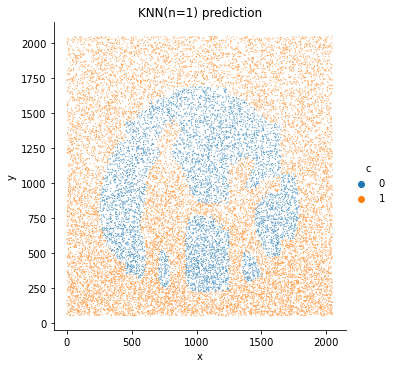

In [10]:
sns.relplot(x='x',y='y',hue='c',s=1,data=df_knn).set(title='KNN(n=1) prediction')

We can see that KNN model is struggling to recreate the circular boundary

# Part 3
We then proceed to another model - Support Vector Classifier
Since the runtime of this model is proportional to the number of data points, we use train_test_split to uniformly discard 90% of data
Then we try to find the optimal value for hyperparameter 'C'

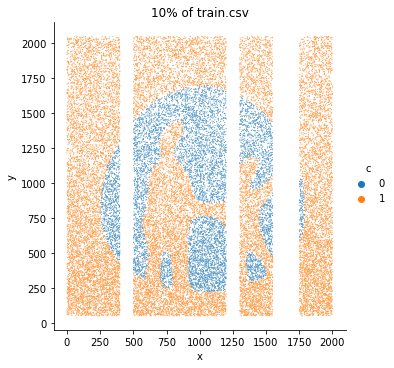

In [11]:
X_train,X_discard,y_train,y_discard=train_test_split(X,y,test_size=0.90,random_state=42)
df_temp=X_train.copy()
df_temp['c']=y_train
sns.relplot(x='x',y='y',hue='c',s=1,data=df_temp).set(title='10% of train.csv')

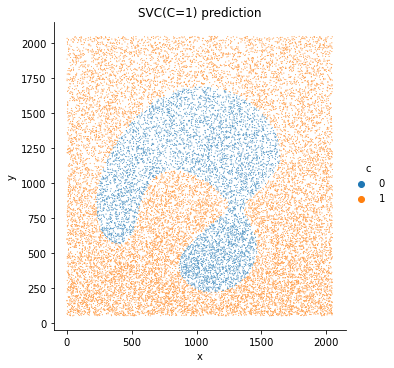

In [12]:
svc=SVC(C=1)
svc.fit(X_train,y_train)
y_svc=svc.predict(X_test)
df_svc1=X_test.copy()
df_svc1['c']=y_svc
sns.relplot(x='x',y='y',hue='c',s=1,data=df_svc1).set(title='SVC(C=1) prediction')

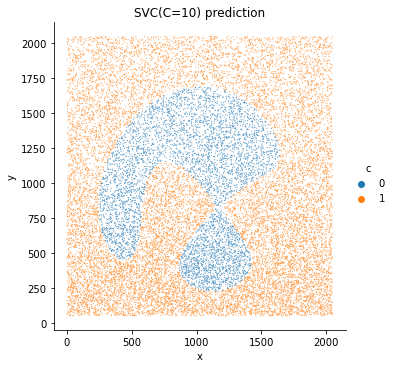

In [13]:
svc=SVC(C=10)
svc.fit(X_train,y_train)
y_svc=svc.predict(X_test)
df_svc10=X_test.copy()
df_svc10['c']=y_svc
sns.relplot(x='x',y='y',hue='c',s=1,data=df_svc10).set(title='SVC(C=10) prediction')

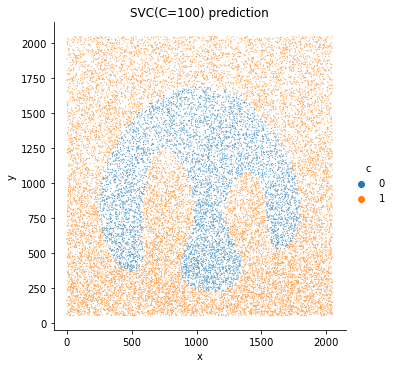

In [14]:
svc=SVC(C=100)
svc.fit(X_train,y_train)
y_svc=svc.predict(X_test)
df_svc100=X_test.copy()
df_svc100['c']=y_svc
sns.relplot(x='x',y='y',hue='c',s=1,data=df_svc100).set(title='SVC(C=100) prediction')

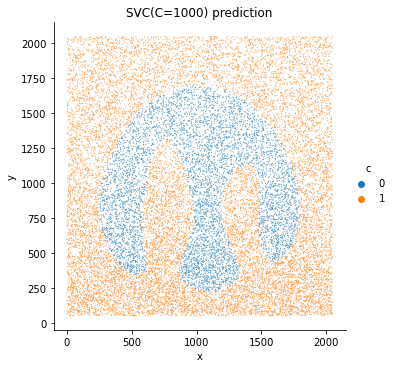

In [15]:
svc=SVC(C=1000)
svc.fit(X_train,y_train)
y_svc=svc.predict(X_test)
df_svc1000=X_test.copy()
df_svc1000['c']=y_svc
sns.relplot(x='x',y='y',hue='c',s=1,data=df_svc1000).set(title='SVC(C=1000) prediction')

We can see that 'C'=1000 gives the best result for recreating the circular boundary
The model overall struggles to recreate the inner part of the circle

# Part 4
In this part we combine the two models: for the x-coordinates which correspond to the blank stripes in the original, we use SVC, for the rest of x-values we use KNN

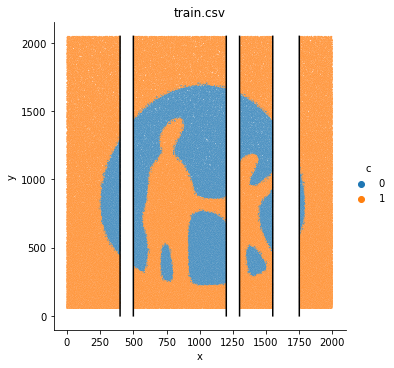

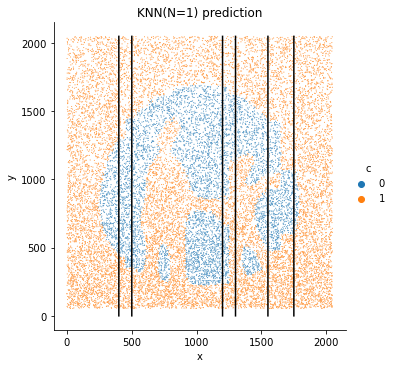

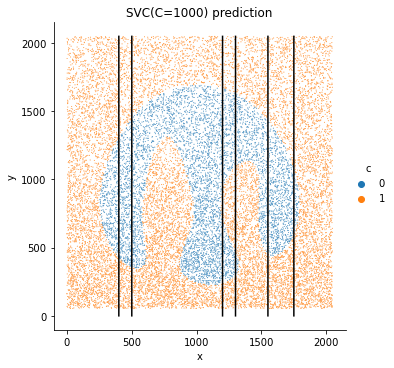

In [16]:
sns.relplot(x='x',y='y',hue='c',s=1,data=df).set(title='train.csv')
plt.plot(400*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(500*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1200*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1300*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1550*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1750*np.ones(2049),np.arange(0,2049),c='black')

sns.relplot(x='x',y='y',hue='c',s=1,data=df_knn).set(title='KNN(N=1) prediction')
plt.plot(400*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(500*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1200*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1300*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1550*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1750*np.ones(2049),np.arange(0,2049),c='black')

sns.relplot(x='x',y='y',hue='c',s=1,data=df_svc1000).set(title='SVC(C=1000) prediction')
plt.plot(400*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(500*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1200*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1300*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1550*np.ones(2049),np.arange(0,2049),c='black')
plt.plot(1750*np.ones(2049),np.arange(0,2049),c='black')

In [17]:
df_total=df_knn.copy()
n=len(df_total)
q=np.arange(400,501)
q=np.append(q,np.arange(1550,1751))
for i in range(n):
    if df_total.iloc[i]['x'] in q:
        df_total.iloc[i]['c']=df_svc1000.iloc[i]['c']

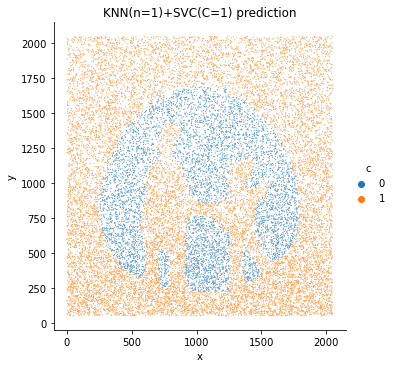

In [18]:
sns.relplot(x='x',y='y',hue='c',s=1,data=df_total).set(title='KNN(n=1)+SVC(C=1) prediction')

Above is the combined model, which looks pretty similar to the original logo.
This model got into top 10 of the leaderboard

In [20]:
df_total=df_total.reset_index()
df_total.rename(columns = {'index':'id'}, inplace = True)
ans=df_total[['id','c']]
ans.to_csv('answer_svm+knn.csv',index=False)